In [1]:
from sklearn.datasets import load_sample_image

In [10]:
import tensorflow as tf

In [2]:
china = load_sample_image('china.jpg') /255

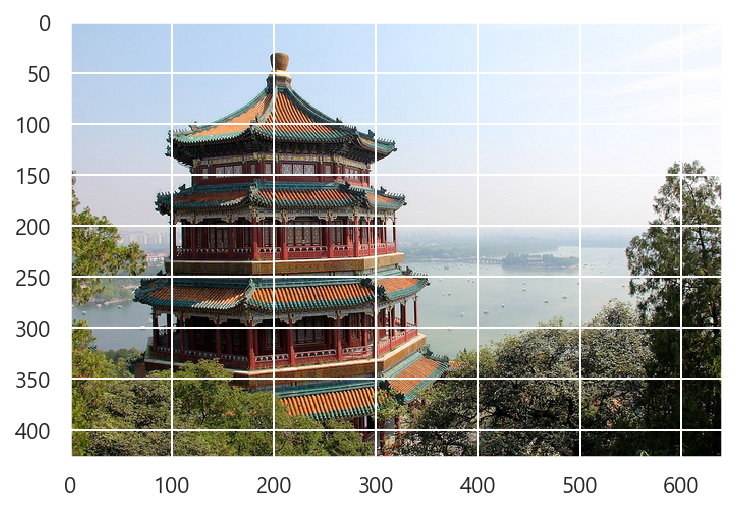

In [6]:
plt.imshow(china)
plt.show()

In [7]:
flower = load_sample_image('flower.jpg') /255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [8]:
images.shape

(2, 427, 640, 3)

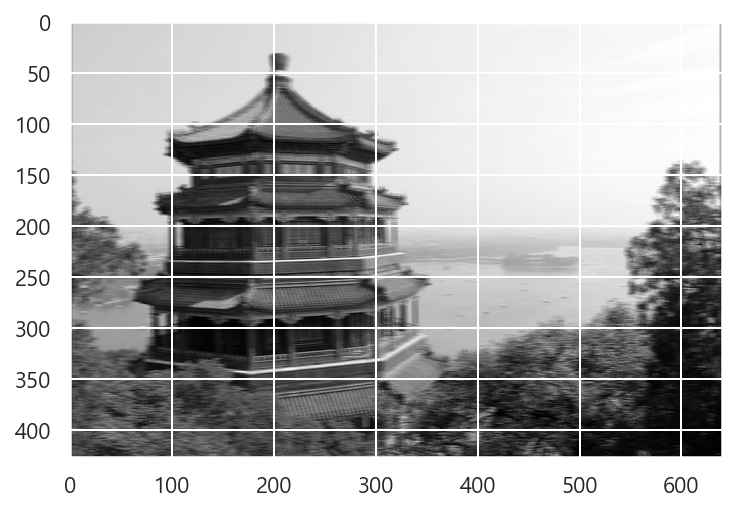

In [20]:
filters = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

outputs = tf.nn.conv2d(images, filters, strides =1, padding='SAME')

plt.imshow(outputs[0, : , : ,1], cmap='gray')
plt.show()

In [21]:
(5*5*3+1)*200

15200

In [22]:
15200*150*100

228000000

In [24]:
output = tf.nn.max_pool(images, ksize=(1,1,1,3), strides=(1, 1, 1, 3), padding='VALID')

In [26]:
from tensorflow import keras

In [27]:
depth_pool = keras.layers.Lambda(lambda X : tr.nn.max_pool(X, ksize=(1,1,1,3), strides=(1,1,1,3), padding="VALID"))

## ReLu

In [ ]:
model= keras.models.Sequential([keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28,28,1]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation= 'relu', padding='same'),
keras.layers.Dropout(0.5)        
keras.layers.Dense(64, activation= 'relu', padding='same')                            
keras.layers.Dropout(0.5)                                        
keras.layers.Dense(10, activation = 'relu', )                         
                               ])
                            

#### ResNet 34 구현

In [28]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super().activations.get(activation)
        self.main_layers = [keras.layers.Conv2D(filters, 3, strides=strides, padding='same', use_bias=False),
                            keras.layers.BatchNormalization(),
                            self.activation,
                            keras.layers.Conv2D(filters, 3, strides=1, padding='same', use_bias=False),
                            keras.layers.BatchNormalizaion()
                           ]
        
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [keras.layers.Conv2D(filters, 1, strides=strides, padding='same', use_bias=False),
                               keras.layers.BatchNormalization()]
            
            
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
            
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
            
        return self.activation(Z + skip_Z)
    
        

### Sequential 이용해서 Resnet 34 만들기

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224, 224, 3], padding='same', use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=3 , strides=2, padding='same'))
prev_filters = 64
for filters in [64]*3 + [128]*4 + [256] * 6 + [512] * 3:
    strides =1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
    
model.add(keras.layers.GlobalAvgPool2D())    
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

    

### 사전훈련된 모델을 사용한 전이 학습


In [1]:
!pip install tensorflow-datasets


In [2]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits['train'].num_examples
class_names = info.features['label'].names
n_classes = info.features['label'].num_classes


Dataset tf_flowers downloaded and prepared to C:\Users\Owner\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [4]:
dir(tfds.Split.TRAIN)

['TEST',
 'TRAIN',
 'VALIDATION',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitli

In [9]:
train_set, valid_set, test_set = tfds.load('tf_flowers', split=[ 'train[:75%]', 'train[75%:90%]','train[90%:]' ],as_supervised=True)

In [15]:
import tensorflow as tf

In [17]:
from tensorflow import keras

In [18]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [20]:
batch_size = 32
train_set = train_set.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)

In [22]:
base_model = keras.applications.xception.Xception(weights='imagenet', include_top= False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

83689472/83683744 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 0us/step


In [25]:
for layer in base_model.layers:
    layer.trainable = False
optimizer = keras.optimizers.SGD(lr=0.2 , momentum=0.9, decay=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
history = model.fit(train_set, epochs=5, validation_data =valid_set)    

Epoch 1/5
86/86 [==============================] - ETA: 0s - loss: 1.7303 - accuracy: 0.15 - ETA: 1:05 - loss: 2.0009 - accuracy: 0.25 - ETA: 1:26 - loss: 2.0982 - accuracy: 0.21 - ETA: 1:35 - loss: 2.3576 - accuracy: 0.26 - ETA: 1:40 - loss: 2.3531 - accuracy: 0.31 - ETA: 1:43 - loss: 2.4878 - accuracy: 0.36 - ETA: 1:46 - loss: 2.8755 - accuracy: 0.38 - ETA: 1:47 - loss: 2.8151 - accuracy: 0.41 - ETA: 1:48 - loss: 2.8654 - accuracy: 0.44 - ETA: 1:49 - loss: 2.9422 - accuracy: 0.45 - ETA: 1:50 - loss: 2.8356 - accuracy: 0.48 - ETA: 1:50 - loss: 2.9258 - accuracy: 0.48 - ETA: 1:50 - loss: 2.9528 - accuracy: 0.50 - ETA: 1:50 - loss: 2.8463 - accuracy: 0.51 - ETA: 1:49 - loss: 2.8696 - accuracy: 0.52 - ETA: 1:49 - loss: 2.8422 - accuracy: 0.53 - ETA: 1:48 - loss: 2.7979 - accuracy: 0.54 - ETA: 1:49 - loss: 2.6870 - accuracy: 0.56 - ETA: 1:49 - loss: 2.6079 - accuracy: 0.58 - ETA: 1:48 - loss: 2.5262 - accuracy: 0.59 - ETA: 1:47 - loss: 2.4763 - accuracy: 0.59 - ETA: 1:47 - loss: 2.4034 - 

86/86 [==============================] - ETA: 0s - loss: 0.2028 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1436 - accuracy: 0.95 - ETA: 1:46 - loss: 0.4706 - accuracy: 0.92 - ETA: 1:58 - loss: 0.3996 - accuracy: 0.93 - ETA: 2:04 - loss: 0.4114 - accuracy: 0.92 - ETA: 2:08 - loss: 0.3596 - accuracy: 0.92 - ETA: 2:10 - loss: 0.3221 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2993 - accuracy: 0.93 - ETA: 2:11 - loss: 0.2713 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2537 - accuracy: 0.94 - ETA: 2:11 - loss: 0.2559 - accuracy: 0.94 - ETA: 2:10 - loss: 0.2449 - accuracy: 0.94 - ETA: 2:10 - loss: 0.2515 - accuracy: 0.93 - ETA: 2:09 - loss: 0.2481 - accuracy: 0.93 - ETA: 2:08 - loss: 0.2363 - accuracy: 0.93 - ETA: 2:08 - loss: 0.2663 - accuracy: 0.93 - ETA: 2:07 - loss: 0.2563 - accuracy: 0.93 - ETA: 2:06 - loss: 0.2857 - accuracy: 0.93 - ETA: 2:05 - loss: 0.2747 - accuracy: 0.93 - ETA: 2:04 - loss: 0.2686 - accuracy: 0.93 - ETA: 2:03 - loss: 0.2597 - accuracy: 0.93 - ETA: 2:01 - loss: 0.2598 - accuracy: 

86/86 [==============================] - ETA: 0s - loss: 0.3478 - accuracy: 0.96 - ETA: 1:19 - loss: 0.2465 - accuracy: 0.96 - ETA: 1:45 - loss: 0.1745 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1993 - accuracy: 0.95 - ETA: 2:04 - loss: 0.1625 - accuracy: 0.96 - ETA: 2:07 - loss: 0.1357 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1408 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1427 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1297 - accuracy: 0.96 - ETA: 2:11 - loss: 0.1229 - accuracy: 0.96 - ETA: 2:10 - loss: 0.1125 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1109 - accuracy: 0.96 - ETA: 2:09 - loss: 0.1031 - accuracy: 0.97 - ETA: 2:08 - loss: 0.0971 - accuracy: 0.97 - ETA: 2:07 - loss: 0.1048 - accuracy: 0.97 - ETA: 2:07 - loss: 0.1051 - accuracy: 0.96 - ETA: 2:06 - loss: 0.1124 - accuracy: 0.96 - ETA: 2:05 - loss: 0.1111 - accuracy: 0.96 - ETA: 2:04 - loss: 0.1088 - accuracy: 0.96 - ETA: 2:02 - loss: 0.1035 - accuracy: 0.96 - ETA: 2:01 - loss: 0.1002 - accuracy: 0.96 - ETA: 2:00 - loss: 0.0992 - accuracy: 

In [26]:
for layer in base_model.layers:
    layer.trainable = True
optimizer = keras.optimizers.SGD(lr=0.01 , momentum=0.9, decay=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
history = model.fit(train_set, epochs=5, validation_data =valid_set)    

Epoch 1/5
46/86 [===============>..............] - ETA: 0s - loss: 0.8955 - accuracy: 0.78 - ETA: 8:13 - loss: 0.7015 - accuracy: 0.81 - ETA: 11:11 - loss: 0.7168 - accuracy: 0.791 - ETA: 12:45 - loss: 0.7369 - accuracy: 0.789 - ETA: 13:40 - loss: 0.8050 - accuracy: 0.762 - ETA: 14:11 - loss: 0.7911 - accuracy: 0.765 - ETA: 14:31 - loss: 0.7617 - accuracy: 0.758 - ETA: 14:42 - loss: 0.7913 - accuracy: 0.761 - ETA: 14:49 - loss: 0.7864 - accuracy: 0.763 - ETA: 14:50 - loss: 0.7488 - accuracy: 0.775 - ETA: 14:51 - loss: 0.7535 - accuracy: 0.767 - ETA: 14:49 - loss: 0.7536 - accuracy: 0.770 - ETA: 14:47 - loss: 0.7418 - accuracy: 0.771 - ETA: 14:43 - loss: 0.7450 - accuracy: 0.770 - ETA: 14:44 - loss: 0.7390 - accuracy: 0.779 - ETA: 14:47 - loss: 0.7274 - accuracy: 0.779 - ETA: 14:40 - loss: 0.7146 - accuracy: 0.783 - ETA: 14:31 - loss: 0.7120 - accuracy: 0.786 - ETA: 14:21 - loss: 0.6981 - accuracy: 0.791 - ETA: 14:11 - loss: 0.6907 - accuracy: 0.790 - ETA: 14:04 - loss: 0.6729 - accurac

KeyboardInterrupt: 